In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('data\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math score'],axis=1)

In [6]:
y=df['math score']

In [7]:
num_features= X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [8]:
X=preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((800, 19), (200, 19))

In [15]:
def evaluate_model(true,predicted):
    mae=median_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [16]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train,y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('model performance for training set')
    print(" - rmse: {:.4f}".format(model_train_rmse))
    print(" - mae: {:.4f}".format(model_train_mae))
    print(" - r2: {:.4f}".format(model_train_r2))
    
    print("---------------")
    
    print("model performance for test set")
    print(" - rmse: {:.4f}".format(model_test_rmse))
    print(" - mae: {:.4f}".format(model_test_mae))
    print(" - r2: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Linear Regression
model performance for training set
 - rmse: 5.3274
 - mae: 3.6250
 - r2: 0.8741
---------------
model performance for test set
 - rmse: 5.4096
 - mae: 3.3984
 - r2: 0.8797


Lasso
model performance for training set
 - rmse: 6.5938
 - mae: 4.3902
 - r2: 0.8071
---------------
model performance for test set
 - rmse: 6.5197
 - mae: 4.4739
 - r2: 0.8253


Ridge
model performance for training set
 - rmse: 5.3233
 - mae: 3.5852
 - r2: 0.8743
---------------
model performance for test set
 - rmse: 5.3904
 - mae: 3.3400
 - r2: 0.8806


KNeighborsRegressor
model performance for training set
 - rmse: 5.7122
 - mae: 3.8000
 - r2: 0.8553
---------------
model performance for test set
 - rmse: 7.2516
 - mae: 4.8000
 - r2: 0.7839


Decision Tree Regressor
model performance for training set
 - rmse: 0.2795
 - mae: 0.0000
 - r2: 0.9997
---------------
model performance for test set
 - rmse: 8.3202
 - mae: 5.0000
 - r2: 0.7155


Random Forest Regressor
model performance for training s

In [18]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'r2']).sort_values(by=["r2"],ascending=False)

,Model Name,r2
2,Ridge,0.880593
0,Linear Regression,0.879740
7,CatBoostRegressor,0.851632
5,Random Forest Regressor,0.851427
8,AdaBoostRegressor,0.850766
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783898
4,Decision Tree Regressor,0.715520


In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(' accuracy is %.2f' % (score))


 accuracy is 87.97


Text(0, 0.5, 'Predicted Values')

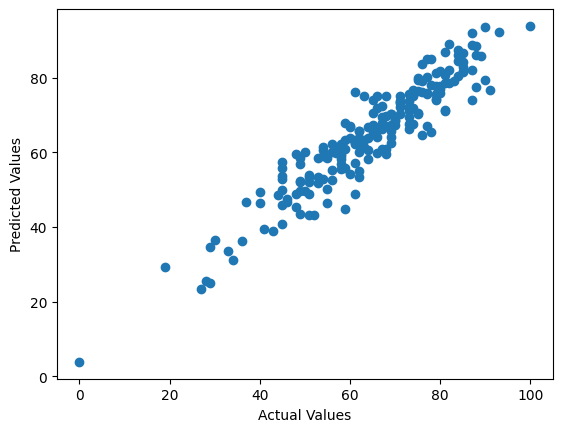

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<Axes: xlabel='math score'>

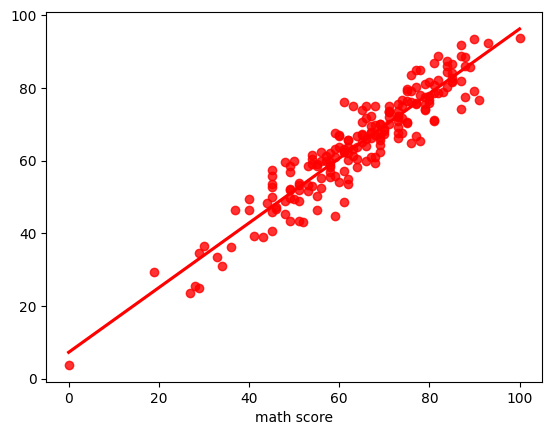

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
